# Results for Bioinformatics Advances Paper

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import numpy as np
from pandas_plink import read_plink
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.patches as mpatches

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [5]:
!pwd

/Home/ii/muhammadm/Bioinf_Adv_Results


In [6]:
files = np.load('/Home/ii/muhammadm/RF_regression/ADNI_gwas_catlog/results_freesurfer_indvtask_allgenes_210222.npz')
# This file contains the results for RMSE values for all the SNPs using Random Forest, Ridge Regression & Lasso Regression
# The user will need to generate this file as it cant be uploaded here due to large file size.
# Keep in mind that it takes extremly long time to generate the file.

In [14]:
RMSE_rf_all = files['RMSE_rf']
RMSE_rid_all = files['RMSE_rid']
RMSE_las_all = files['RMSE_las']

# Pairplot showing the RMSE distribution and scatter plots between the methods

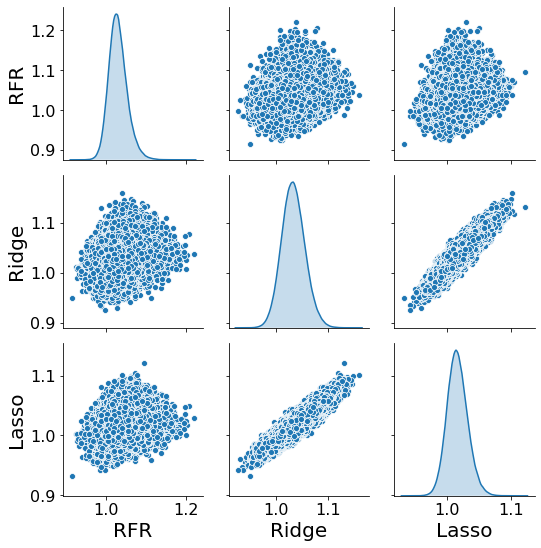

In [8]:
df_R2 = pd.DataFrame([RMSE_rf_all,RMSE_rid_all,RMSE_las_all]).T
df_R2.columns = ['RFR', 'Ridge', 'Lasso']
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"]=  16
plt.rcParams["ytick.labelsize"]=  16
sns.pairplot(df_R2, diag_kind='kde', height=2.5)

# Spearman correlation coefficients for RMSE values across the methods

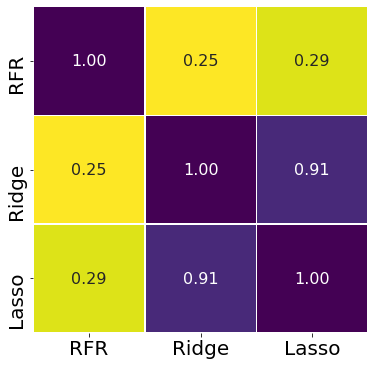

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
#calculate the correlation matrix
corr = df_R2.corr(method='spearman')

#plot the heatmap
ax = sns.heatmap(corr, 
       xticklabels=corr.columns,
       yticklabels=corr.columns, cmap='viridis_r',  annot=True, fmt=".2f", linewidths=.5, cbar=False,
               annot_kws={"fontsize":16})

ax.tick_params(labelsize=20)

# Negative log transformed p-values plotted across the whole genome

(array([ 20106.5,  61659. , 101055.5, 134979.5, 167196. , 201378.5,
        233825.5, 263004.5, 290263.5, 316644. , 343354. , 369050. ,
        391734. , 410307. , 426821.5, 442596. , 457471. , 472233. ,
        484722.5, 496049. , 506594.5, 514486.5]),
 <a list of 22 Text xticklabel objects>)

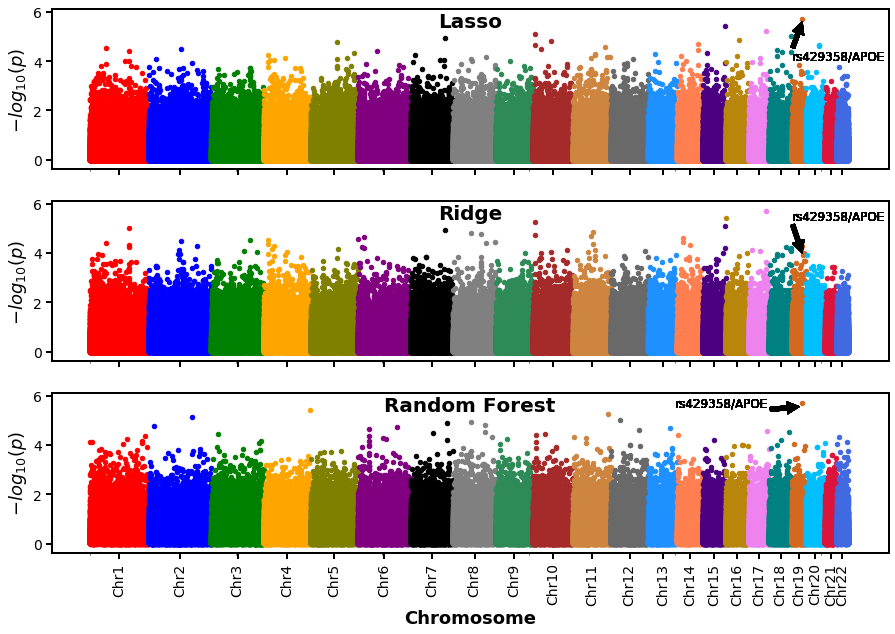

In [17]:
df_chrom = pd.DataFrame()


df_chrom['chrom'] = bim.chrom
df_chrom['snp'] = bim.snp
df_chrom['posit'] = bim.pos


df_chrom = df_chrom.append(pd.DataFrame([19,'APOE',50103781], index = ['chrom', 'snp', 'posit']).T, ignore_index=True)
df_chrom.chrom = df_chrom.chrom.astype(int)
df_chrom.posit = df_chrom.posit.astype(int)

df_chrom['rmse_las_all'] = (RMSE_las_all)
df_chrom['rmse_rid_all'] = (RMSE_rid_all)
df_chrom['rmse_rf_all'] = (RMSE_rf_all)


df_chrom['pvals_rf'] = -np.log10((stats.rankdata(RMSE_rf_all)/RMSE_rf_all.shape[0]))
df_chrom['pvals_las'] = -np.log10((stats.rankdata(RMSE_las_all)/RMSE_rf_all.shape[0]))
df_chrom['pvals_rid'] = -np.log10((stats.rankdata(RMSE_rid_all)/RMSE_rf_all.shape[0]))

# df_chrom['pvals_rf'] = ((stats.rankdata(RMSE_rf_all)/RMSE_rf_all.shape[0]))
# df_chrom['pvals_las'] = ((stats.rankdata(RMSE_las_all)/RMSE_rf_all.shape[0]))
# df_chrom['pvals_rid'] = ((stats.rankdata(RMSE_rid_all)/RMSE_rf_all.shape[0]))

df_chrom = df_chrom.sort_values(by =['chrom','posit'])
df_chrom.chrom = df_chrom.chrom.astype('category')
df_chrom['ind'] = range(len(df_chrom))
df_grouped = df_chrom.groupby(('chrom'))

fig,ax = plt.subplots(3, 1, figsize=(15,10), sharex=True, sharey=False)

colors = ['red','blue', 'green', 'orange', 'olive','purple', 'black','gray','seagreen','brown', 'peru',
         'dimgray','dodgerblue','coral','indigo','darkgoldenrod','violet','teal','chocolate','deepskyblue',
         'crimson','royalblue']
x_labels = []
x_labels_pos = []

chr_lab = ['Chr1', 'Chr2', 'Chr3', 'Chr4']
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='pvals_las',color=colors[num % len(colors)], ax=ax[0], s=20)
    group.plot(kind='scatter', x='ind', y='pvals_rid',color=colors[num % len(colors)], ax=ax[1], s=20)
    group.plot(kind='scatter', x='ind', y='pvals_rf',color=colors[num % len(colors)], ax=ax[2], s=20)

    ax[2].annotate('rs429358/APOE', xy=(485000, 5.55), xytext=(400000, 5.55),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    ax[0].annotate('rs429358/APOE', xy=(487000, 5.60), xytext=(480000, 4.05),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    ax[1].annotate('rs429358/APOE', xy=(487000, 4.00), xytext=(480000, 5.35),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    x_labels.append('Chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

methods = ['Lasso', 'Ridge','Random Forest']
i = 0
for axs in ax:
    axs.set_xticks(x_labels_pos)
    axs.spines['left'].set_linewidth(2)
    axs.spines['bottom'].set_linewidth(2)
    axs.spines['right'].set_linewidth(2)
    axs.spines['top'].set_linewidth(2)
#    axs.invert_yaxis()
    axs.tick_params(labelsize=14, length = 6, width=2)
    axs.set_xticklabels(x_labels)
    #axs.set_ylim([-0.025, 0.04])
#    axs.set_ylim([1.0, 0.9])
    axs.set_xlabel('Chromosome', fontsize=18, fontweight='bold')
    axs.set_ylabel('$-log_{10}(p)$', fontsize=18, fontweight='bold')
#     axs.set_title(methods[i], fontsize=18, fontweight='bold', y = 1.0, pad=-50)
#    i += 1
ax[0].set_title(methods[0], fontsize=20, fontweight='bold', y = 0.85)
ax[1].set_title(methods[1], fontsize=20, fontweight='bold', y = 0.85)
ax[2].set_title(methods[2], fontsize=20, fontweight='bold',y = 0.85)
plt.xticks(rotation=90)

# Heat maps of feature weights for top 1000 SNPs identified by random forest

In [18]:
df_imp = pd.read_table('/Home/ii/muhammadm/backup_data_ammar/ADNI_Excel_Files/NewROIsTest/top1000SNP_feats.csv', sep = ",")
df_imp.index = df_imp['Unnamed: 0']
df_imp = df_imp.drop(columns = ['Unnamed: 0'])

In [20]:
snps = bim.snp.values[np.where(RMSE_rf_all<=0.97)[0][:-1]]
df_chrs = pd.DataFrame([])
df_chrs['chr'] = np.hstack([bim.chrom.values[np.where(RMSE_rf_all<=0.97)[0][:-1]].astype(int), 19])
df_chrs.index = np.hstack([snps, 'rs429358/APOE'])

In [21]:
lut = dict(zip(df_chrs['chr'].unique(), sns.hls_palette(22)))
row_colors = df_chrs['chr'].map(lut)
df_norm_imp = df_imp.T/(df_imp.T.max())

In [27]:
patches = []

for i in range(len(df_chrs['chr'].unique())):
    patches.append(mpatches.Patch(color=row_colors.unique()[i], label = 'Chr'+df_chrs['chr'].unique()[i].astype(str)))

In [28]:
g = sns.clustermap((df_norm_imp), cmap='viridis', figsize=(200,85),
                  linewidth=1.5, cbar_pos=(.15, .15, .02 , .5), col_colors=row_colors,
                  row_cluster=True, col_cluster=True) #cbar_kws={"ticks":[0.,1]}
g.ax_row_dendrogram.remove()

g.ax_col_dendrogram.remove()

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 120)

g.ax_cbar.set_yticklabels(g.ax_cbar.get_yticklabels(), fontsize= 120)

patches = []

for i in range(len(df_chrs['chr'].unique())):
    patches.append(mpatches.Patch(color=row_colors.unique()[i], label = 'Chr'+df_chrs['chr'].unique()[i].astype(str)))

plt.legend(handles=patches, bbox_to_anchor=(39, 1.50), fontsize = 120, ncol = 11, 
           title = 'Color map for Chromosome IDs', title_fontsize=150)

# Permutation test results for Random Forest

In [29]:
files_reg = np.load('/Home/ii/muhammadm/backup_data_ammar/ADNI_Excel_Files/NewROIsTest/results_fs_indvtask_40genes_withperm.npz')
files_clf = np.load('/Home/ii/muhammadm/backup_data_ammar/ADNI_Excel_Files/NewROIsTest/results_40genes_permtest_withclf.npz')

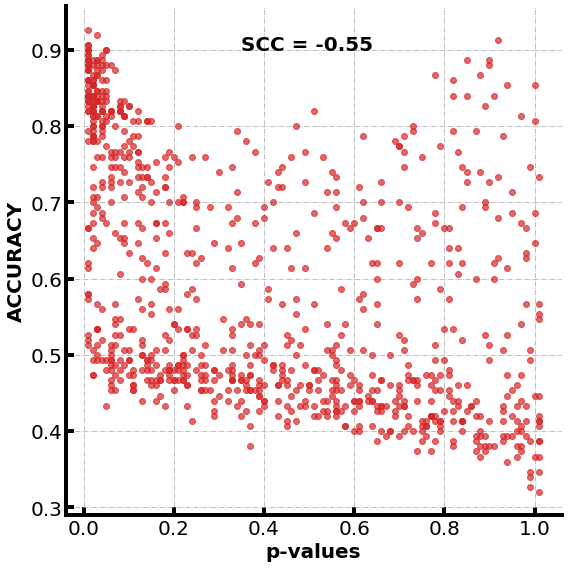

In [31]:

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(files_clf['pvals'], files_clf['ACC'], 'o', color='tab:red', alpha=0.7)

ax.set_xlabel("p-values", fontsize=20, fontweight='bold')
ax.set_ylabel("ACCURACY", fontsize=20, fontweight='bold')
ax.grid(True, linestyle='-.')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

ax.tick_params(length = 8, width=4, labelsize = 20, direction = 'in')

ax.annotate("SCC = {:.2f}".format(stats.spearmanr(files_clf['pvals'],files_clf['ACC'])[0]), 
            (0.35, 0.9), size=20,  weight='bold')

plt.tight_layout()

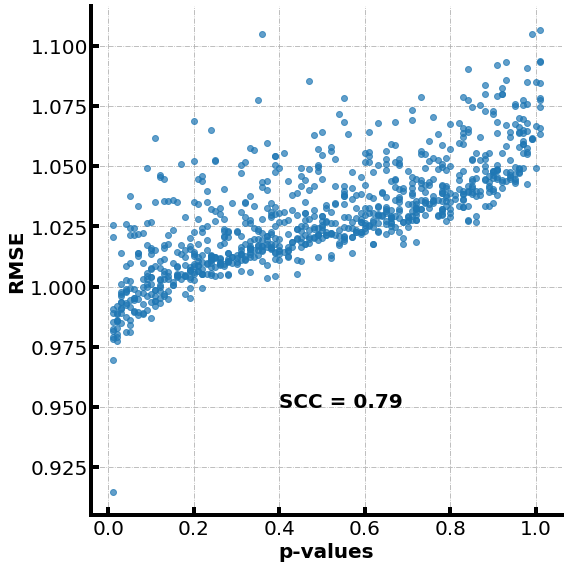

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(files_reg['pvals'], files_reg['RMSE'], 'o', color='tab:blue', alpha=0.7)

ax.set_xlabel("p-values", fontsize=20, fontweight='bold')
ax.set_ylabel("RMSE", fontsize=20, fontweight='bold')
ax.grid(True, linestyle='-.')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

ax.tick_params(length = 8, width=4, labelsize = 20, direction = 'in')

ax.annotate("SCC = {:.2f}".format(stats.spearmanr(files_reg['pvals'], files_reg['RMSE'])[0]), 
            (0.4, 0.95), size=20,  weight='bold')

plt.tight_layout()